In [ ]:
# HYPOTHESIS TESTING

In [ ]:
# Hypothesis 4:
# Teams of collaborating authors consist of an equal amount of men and women.

#Hypothesis 5:
# Bigger teams are more diverse.

In [1]:
# >>> Preparation
import pandas

print("Importing publications... ")
cols = [
    'key', 
    'pub_cat',
    'pub_type',
    'title',
    'year',
    'authors',
    'n_authors',
    'n_males',
    'n_females',
    'n_unknown',
    'ratio',
    'n_contribs_females',
    'n_contribs_males',
    'n_contribs_unknown'
]

publs = pandas.read_csv("data/publications_cor3.csv", usecols=cols)

# Setting index & accessing cells: https://pythonhow.com/accessing-dataframe-columns-rows-and-cells/
publs = publs.set_index("key", drop = False)
print("Publications imported. They look like this: {}".format(publs[:5]))

Importing publications... 


C:\Program_Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Publications imported. They look like this:                                                                  key  \
key                                                                    
books/acm/0082477                                  books/acm/0082477   
books/acm/Kim95                                      books/acm/Kim95   
books/acm/kim95/AnnevelinkACFHK95  books/acm/kim95/AnnevelinkACFHK95   
books/acm/kim95/Blakeley95                books/acm/kim95/Blakeley95   
books/acm/kim95/BreitbartGS95          books/acm/kim95/BreitbartGS95   

                                        pub_cat pub_type  \
key                                                        
books/acm/0082477                          book      NaN   
books/acm/Kim95                            book      NaN   
books/acm/kim95/AnnevelinkACFHK95  incollection      NaN   
books/acm/kim95/Blakeley95         incollection      NaN   
books/acm/kim95/BreitbartGS95      incollection      NaN   

                              

In [2]:
# get only those publications created by teams
team_publs = publs[publs['n_authors'] > 1]

In [3]:
# Outlier calculation
print("Calculating from what point on a team is an outlier, considering its size...")
import numpy as np
lower = np.percentile(team_publs["n_authors"], 25)
higher = np.percentile(team_publs["n_authors"], 75)
interquart_range = higher - lower
outer_fence = higher + interquart_range * 3
print("The outer fence is {}".format(outer_fence))

Calculating from what point on a team is an outlier, considering its size...
The outer fence is 10.0


In [4]:
# get only those publications created by regular small teams
small_teams = team_publs[team_publs["n_authors"] <= outer_fence]

In [5]:
# >>> Testing
# H4

# Finding the mode of a series: https://stackoverflow.com/questions/10797819/finding-the-mode-of-a-list
from statistics import mode

# Relative values
# Publications Contributed to
# Finding the mode of a series: https://stackoverflow.com/questions/10797819/finding-the-mode-of-a-list
print("Calculating the mode...")

mode_all = mode(small_teams["ratio"])

not_all_unknown = small_teams[small_teams["n_unknown"] != small_teams["n_authors"]]
mode_not_all_unknown = mode(not_all_unknown["ratio"])

print("The mode for all is {}.".format(mode_all))
print("The mode for those where at least one author could be classified is {}.".format(mode_not_all_unknown))

Calculating the mode...
The mode for all is 50.0.
The mode for those where at least one author could be classified is 50.0.


In [ ]:
# Calculate best case scenario of gender equality for women considering all unclassified authors to be female.
'''def new_ratio(n, f, u):
    half_rel = n / 2.0
    abs_m_to_be_replaced_by_f = half_rel - (f + u)
    rel_m_to_be_replaced_by_f = abs_m_to_be_replaced_by_f / n * 100
    r_max = rel_m_to_be_replaced_by_f
    return r_max

print("Calculating ratios for the case that all unclassified authors are women...")

ratios = []

for index, row in small_teams.iterrows():
    n = row["n_authors"]
    f = row["n_females"]
    u = row["n_unknown"]
    ratios.append(new_ratio(n, f, u))
    
print("Done!")'''

In [ ]:
'''ratios_df = pandas.DataFrame({'ratio':ratios})
ratios_df.describe()'''

In [ ]:
#mode(ratios_df["ratio"])

In [ ]:
diff = not_all_unknown["n_contribs_males"] - not_all_unknown["n_contribs_females"]

In [ ]:
diff = diff.values

In [ ]:
plt.hist(diff, bins=100)

In [ ]:
from scipy.stats import wilcoxon
wilcoxon(diff, zero_method='zsplit') # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html

In [ ]:
'''import matplotlib.pyplot as plt
ratios_df["ratio"].hist(color="orange", bins=20)
plt.title("Histogram of gender inequality index of publications\n contributed to by more than one author\n (assuming all unclassified authors are female).")
plt.xlabel("Gender Inequality Index")
plt.ylabel("Amount of publications")'''

In [ ]:
# Visualization
# Show histogram considering not considering publications where none of the authors could be classified
import matplotlib.pyplot as plt
print("Visualizing Gender Inequality Index Histogram without publications, where no author could be classified...")
team_publs["ratio"].hist(alpha=0, color="orange", bins=5) # round(max(team_publs["ratio"]))
not_all_unknown["ratio"].hist(color="orange", bins=5) # round(max(not_all_unknown["ratio"]))
plt.title("Histogram of gender inequality index of publications\n contributed to by more than one author\n where at least one author was classified by gender.")
plt.xlabel("Gender Inequality Index")
plt.ylabel("Amount of publications")
#team_publs_all_unknown["ratio"].hist(alpha=0.5, color="orange")

In [ ]:
# Gleichverteilung Ausschließen
print("Visualizing Authors by Gender by Publication Histogram without publications, where no author could be classified...")
not_all_unknown["n_males"].hist(color="orange", alpha=0.5, bins=round(max(not_all_unknown["n_males"])), label="male")
not_all_unknown["n_females"].hist(color="red", alpha=0.5, bins=round(max(not_all_unknown["n_females"])), label="female")
plt.title("Histogram of the amount of authors by gender of publications\n contributed to by more than one author\n where at least one author was classified by gender.")
plt.xlabel("Amount of authors per publication")
plt.ylabel("Amount of publications")
plt.legend()

In [ ]:
from scipy.stats import chisquare
dist_f = not_all_unknown["n_females"].value_counts()[:7]
dist_m = not_all_unknown["n_males"].value_counts()[:7]
chisquare(dist_f.values, f_exp=dist_m.values)
# p = 0

In [ ]:
# Show histogram considering authors of unknown gender
print("Visualizing Gender Inequality Index Histogram...")
team_publs["ratio"].hist(color="orange", bins=20)
not_all_unknown["ratio"].hist(color="orange", bins=20)
plt.title("Histogram of gender inequality index of publications\n contributed to by more than one author\n")
plt.xlabel("Gender Inequality Index")
plt.ylabel("Amount of publications")

In [ ]:
# >>> Evaluation
# Hypothesis 4 is not correct. 

In [ ]:
# >>> Testing
# H5 Bigger teams are more diverse.

In [21]:
group_lower = small_teams[small_teams["ratio"] <= 0]
group_higher = small_teams[small_teams["ratio"] >= 0]

In [22]:
from scipy import stats
print("Calculating Spearman's Correlation Coefficient...")
small_teams_cor_l = stats.spearmanr(group_lower["ratio"], group_lower["n_authors"])
small_teams_cor_h = stats.spearmanr(group_higher["ratio"], group_higher["n_authors"])
print(small_teams_cor_l)
print(small_teams_cor_h)
print("Done!")

Calculating Spearman's Correlation Coefficient...
SpearmanrResult(correlation=0.014969751034996153, pvalue=5.045998813740137e-46)
SpearmanrResult(correlation=0.009200546439438925, pvalue=7.657244963634207e-68)
Done!


In [ ]:
# Calculation of distribution statistics.
def m(ratio):
    '''This function is necessary for calculating the mode because otherwise, 
    an exception might be thrown if there is more than one mode.'''
    try:
        return mode(ratio)
    except:
        return None

In [ ]:
print("Calculating distribution statistics: mode, mean, std, median - per team size...")
team_publs_by_n_authors = small_teams.groupby("n_authors")

team_ratio_mode = team_publs_by_n_authors.agg({'ratio':m})
team_ratio_mode["n_authors"] = team_ratio_mode.index.values.tolist()

team_ratio_mean = team_publs_by_n_authors.agg({'ratio':'mean'})
team_ratio_mean["n_authors"] = team_ratio_mean.index.values.tolist()

team_ratio_std = team_publs_by_n_authors.agg({'ratio':'std'})
team_ratio_std["n_authors"] = team_ratio_std.index.values.tolist()

team_ratio_median = team_publs_by_n_authors.agg({'ratio':'median'})
team_ratio_median["n_authors"] = team_ratio_median.index.values.tolist()
print("Done!")

Visualizing distribution statistics per team size as well as individual gender inequality ratio values.


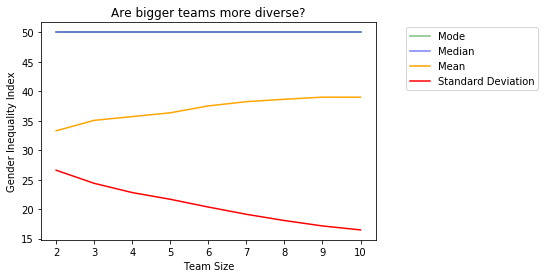

In [28]:
# >>> Visualization
import matplotlib.pyplot as plt
print("Visualizing distribution statistics per team size as well as individual gender inequality ratio values.")
plt.plot(team_ratio_mode["ratio"], label="Mode", alpha=0.5, color="green")
plt.plot(team_ratio_median["ratio"], label="Median", alpha=0.5, color="blue")
plt.plot(team_ratio_mean["ratio"], label="Mean", color="orange")
plt.plot(team_ratio_std["ratio"], label="Standard Deviation", color="red")
#plt.scatter(small_teams["n_authors"], small_teams["ratio"], alpha=0.01, color="grey", label="Gender Inequality Index")
plt.title("Are bigger teams more diverse?")
plt.xlabel("Team Size")
plt.ylabel("Gender Inequality Index")
# Anchor a legend outside the plot: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
plt.legend(bbox_to_anchor=(1.5, 1))

In [ ]:
# >>> Interpretation:
# Hypothesis 5 is not correct.